<a href="https://colab.research.google.com/github/iam-fern/Generate_homo/blob/main/data_var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.DataFrame({"X1" : np.random.uniform(20, 100, 500000),
                     "X2" : np.random.uniform(20, 100, 500000),
                     "X3" : np.random.uniform(20, 100, 500000)})
data

,X1,X2,X3
0,84.590771,66.382699,30.046130
1,58.750925,54.805403,32.513126
2,28.141412,44.484266,31.174884
3,27.154804,44.476602,56.111852
4,28.125906,97.402986,67.305242
...,...,...,...
499995,47.789211,29.155559,96.799861
499996,24.971484,60.344675,83.307735
499997,84.364285,29.663191,89.045833
499998,47.588263,48.934189,39.097138


In [45]:
X1 = data["X1"]
X2 = data["X2"]
X3 = data["X3"]

new_data = pd.DataFrame({"X1" : data["X1"],
                         "X2" : data["X2"],
                         "X3" : data["X3"],
                         "e"  : np.random.normal(0, 1, 500000)})

In [46]:
new_data.to_csv('data_var3.csv')
files.download('data_var3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
n=250
rep=0
table_data_all=pd.DataFrame({"rep":[]})
data_copy=new_data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:].reset_index(drop=True)
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy().reset_index(drop=True)
        data_copy=pd.DataFrame({"":[]})
    #=========================

    table_data = pd.DataFrame({"x1" : data_new["X1"],
                               "x2" : data_new["X2"],
                               "x3" : data_new["X3"],
                               "e"  : data_new["e"]})
  

    table_data["Y"] = 10 + table_data["x1"] + table_data["x2"] + table_data["x3"] + table_data["e"]
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    rep+=1
    if rep==1000:
      break
table_data_all=table_data_all.set_index(["rep", "index"])
table_data_all

x1         x2         x3         e           Y
rep   index                                                       
0.0   0.0    70.658658  64.325177  95.438904  0.213779  240.636519
      1.0    83.273073  22.849664  24.805507  0.019682  140.947927
      2.0    27.855680  63.936757  67.421523 -0.790768  168.423193
      3.0    33.026179  33.860527  59.870271  0.443546  137.200524
      4.0    28.561203  35.930987  86.596446 -0.622147  160.466490
...                ...        ...        ...       ...         ...
999.0 245.0  49.015891  84.643543  81.804499  0.903785  226.367719
      246.0  58.479229  76.580733  79.881378  0.993241  225.934581
      247.0  77.607653  69.147074  89.437721  0.528004  246.720451
      248.0  90.138528  90.742662  87.774037 -0.301356  278.353871
      249.0  23.326226  45.639932  67.422832 -0.185915  146.203076

[250000 rows x 5 columns]

In [60]:
x = table_data_all[["x1", "x2", "x3",]]
y = table_data_all["Y"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

table_data_new = pd.DataFrame({"x1"   : table_data_all["x1"],
                               "x2"   : table_data_all["x2"],
                               "x3"   : table_data_all["x3"],
                               "e"     : table_data_all["e"],
                               "Y"     : df["Actual"],
                               "y_hat" : df["Predicted"]})
table_data_new["e_hat"] = table_data_new["Y"] - table_data_new["y_hat"]
table_data_new

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    70.658658  64.325177  95.438904  ...  240.636519  240.420923  0.215595
      1.0    83.273073  22.849664  24.805507  ...  140.947927  140.933549  0.014378
      2.0    27.855680  63.936757  67.421523  ...  168.423193  169.215361 -0.792169
      3.0    33.026179  33.860527  59.870271  ...  137.200524  136.761869  0.438655
      4.0    28.561203  35.930987  86.596446  ...  160.466490  161.092363 -0.625873
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  49.015891  84.643543  81.804499  ...  226.367719  225.461397  0.906322
      246.0  58.479229  76.580733  79.881378  ...  225.934581  224.939361  0.995221
      247.0  77.607653  69.147074  89.437721  ...  246.720451  246.190019  0.530432
      248.0  90.138528  90.742662  87.774037  ...  278.353871  278.649841 -0.295970
      249.0  23.326226  45.639932  67.422832  ...  146.203076  146.392674 -0.189599

[250000 rows x 7 columns]

In [61]:
table_data_new.to_csv("data_var3_n250.csv")
files.download("data_var3_n250.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

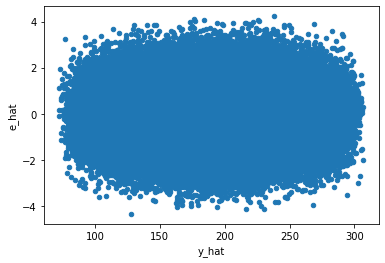

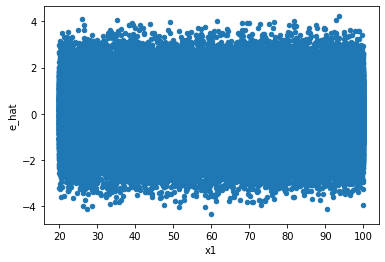

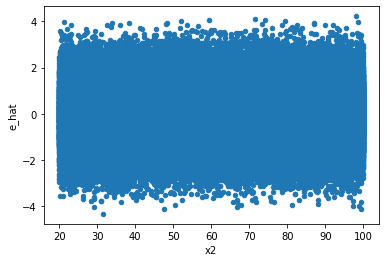

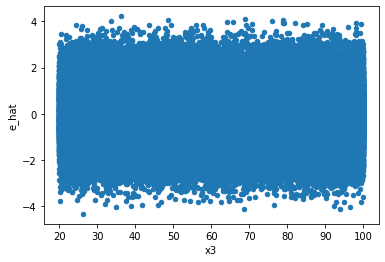

In [43]:
table_data_new.plot(x ='y_hat', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x1', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x2', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x3', y='e_hat', kind = 'scatter')